## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [61]:
x_train.shape

(60000, 28, 28)

In [62]:
x_test.shape

(10000, 28, 28)

In [63]:
y_train.shape

(60000,)

In [64]:
y_test.shape

(10000,)

### Find dimensions of an image in the dataset

In [65]:
x_train[0].shape

(28, 28)

In [66]:
y_test[0]

9

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
import numpy as np
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator


In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [69]:
x_train.shape

(60000, 28, 28, 1)

In [70]:
x_test.shape

(10000, 28, 28, 1)

In [0]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [72]:
y_train.shape

(60000, 10)

In [73]:
y_train[0].shape

(10,)

In [74]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [75]:
y_test.shape

(10000, 10)

In [76]:
y_test[0].shape

(10,)

In [77]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [78]:
x_train.shape

(60000, 28, 28, 1)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train=x_train.astype("float32")

In [0]:
x_test=x_test.astype("float32")

In [0]:
x_train /= 255
x_test /= 255

In [87]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Already done in the above step

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
TRAIN = False
BATCH_SIZE = 32
EPOCHS = 10

In [93]:
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model2
model1.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 26s 437us/step - loss: 0.3751 - acc: 0.8644 - val_loss: 0.2956 - val_acc: 0.8894
Epoch 2/10
60000/60000 [==============================] - 19s 311us/step - loss: 0.2330 - acc: 0.9148 - val_loss: 0.2515 - val_acc: 0.9111
Epoch 3/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1698 - acc: 0.9370 - val_loss: 0.2555 - val_acc: 0.9107
Epoch 4/10
60000/60000 [==============================] - 19s 317us/step - loss: 0.1193 - acc: 0.9557 - val_loss: 0.2678 - val_acc: 0.9120
Epoch 5/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.0811 - acc: 0.9700 - val_loss: 0.2835 - val_acc: 0.9167
Epoch 6/10
60000/60000 [==============================] - 18s 307us/step - loss: 0.0556 - acc: 0.9804 - val_loss: 0.3219 - val_acc: 0.9148
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
BATCH_SIZE = 32
EPOCHS = 10

In [95]:
# Define Model
model2 = Sequential()

# 1st Conv Layer
model2.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model2.add(Activation('relu'))

# 2nd Conv Layer
model2.add(Convolution2D(32, 3, 3))
model2.add(Activation('relu'))

# Max Pooling
model2.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model2.add(Dropout(0.25))

# Fully Connected Layer
model2.add(Flatten())
model2.add(Dense(128))
model2.add(Activation('relu'))
    
# Prediction Layer
model2.add(Dense(10))
model2.add(Activation('softmax'))

# Loss and Optimizer
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model2.fit(x_train, y_train, batch_size=BATCH_SIZE, nb_epoch=EPOCHS, 
              validation_data=(x_test, y_test), callbacks=callback_list)
    




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 18s 308us/step - loss: 0.3972 - acc: 0.8589 - val_loss: 0.2969 - val_acc: 0.8944
Epoch 2/10
60000/60000 [==============================] - 18s 302us/step - loss: 0.2596 - acc: 0.9043 - val_loss: 0.2592 - val_acc: 0.9042
Epoch 3/10
60000/60000 [==============================] - 18s 300us/step - loss: 0.2115 - acc: 0.9209 - val_loss: 0.2387 - val_acc: 0.9117
Epoch 4/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1789 - acc: 0.9334 - val_loss: 0.2402 - val_acc: 0.9137
Epoch 5/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1496 - acc: 0.9434 - val_loss: 0.2233 - val_acc: 0.9223
Epoch 6/10
60000/60000 [==============================] - 18s 297us/step - loss: 0.1279 - acc: 0.9521 - val_loss: 0.2303 - val_acc: 0.9218
Epoch 7/10
60000/60000 [==============================] - 18s 301us/step - loss: 0.1082 - acc: 0.9589 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

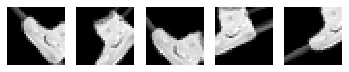

In [107]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [108]:
model2.fit_generator(datagen.flow(x_train, y_train,batch_size=32),
                    samples_per_epoch=x_train.shape[0],
                    nb_epoch=10,
                    validation_data=(x_test, y_test), callbacks=callback_list)

Epoch 1/10
   7/1875 [..............................] - ETA: 35s - loss: 5.6099 - acc: 0.1830

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 33s 18ms/step - loss: 2.2473 - acc: 0.1382 - val_loss: 1.9197 - val_acc: 0.3079
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.7071 - acc: 0.3639 - val_loss: 1.1422 - val_acc: 0.5897
Epoch 3/10
1875/1875 [==============================] - 33s 17ms/step - loss: 1.4287 - acc: 0.4729 - val_loss: 1.0697 - val_acc: 0.6021
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.2592 - acc: 0.5416 - val_loss: 0.9402 - val_acc: 0.6384
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.1426 - acc: 0.5818 - val_loss: 0.7991 - val_acc: 0.7010
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.0688 - acc: 0.6086 - val_loss: 0.8920 - val_acc: 0.6753
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 1.0222 - acc: 0.6292 - val_loss: 0.7656 - val_acc: 0.7191
Epoch 8/10
1875/1875 [==============================] - 33s

###  Report the final train and validation accuracy

In [109]:
loss_and_metrics = model2.evaluate(x_test, y_test)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 90us/step
[0.6762676487922669, 0.7601]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
# Already imported above

### **Load CIFAR10 dataset**

In [0]:
from keras.datasets import cifar10
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()


In [116]:
x_train_cifar.shape

(50000, 32, 32, 3)

In [117]:
x_test_cifar.shape

(10000, 32, 32, 3)

In [118]:
y_train_cifar.shape

(50000, 1)

In [119]:
y_test_cifar.shape

(10000, 1)

In [121]:
y_train_cifar[0].shape

(1,)

In [123]:
y_train[0][0]

6

In [0]:
x_train_cifar = x_train_cifar.astype('float32')
x_test_cifar = x_test_cifar.astype('float32')
x_train_cifar /= 255
x_test_cifar /= 255

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.5,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.5,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

### **Prepare/fit the generator.**

In [0]:
datagen.fit(x_train_cifar)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

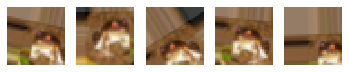

In [127]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_cifar[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()